In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression , LogisticRegression
from sklearn.tree import DecisionTreeRegressor , DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor , KNeighborsClassifier
from sklearn.svm import SVR , SVC
from sklearn.neural_network import MLPRegressor , MLPClassifier
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import mean_squared_error , accuracy_score , silhouette_score , davies_bouldin_score , confusion_matrix , ConfusionMatrixDisplay , make_scorer

In [ ]:
crypto_dataframe0 = pd.read_csv("/content/Binance_BTCUSDT_d.csv", skiprows=1)
crypto_dataframe1 = crypto_dataframe0.copy()
crypto_dataframe1 = crypto_dataframe1.iloc[::-1].reset_index(drop=True)
display(crypto_dataframe1.head(2))

,Unix,Date,Symbol,Open,High,Low,Close,Volume BTC,Volume USDT,tradecount
0,1502928000000,2017-08-17,BTCUSDT,4261.48,4485.39,4200.74,4285.08,795.150377,3.454770e+06,3427
1,1503014400000,2017-08-18,BTCUSDT,4285.08,4371.52,3938.77,4108.37,1199.888264,5.086958e+06,5233


In [ ]:
crypto_dataframe1["Date"] = pd.to_datetime(crypto_dataframe1["Date"])
crypto_dataframe1.set_index("Date", inplace=True)

In [ ]:
crypto_dataframe1.head(2)

,Unix,Symbol,Open,High,Low,Close,Volume BTC,Volume USDT,tradecount
Date,,,,,,,,,
2017-08-17,1502928000000,BTCUSDT,4261.48,4485.39,4200.74,4285.08,795.150377,3.454770e+06,3427
2017-08-18,1503014400000,BTCUSDT,4285.08,4371.52,3938.77,4108.37,1199.888264,5.086958e+06,5233


In [ ]:
crypto_dataframe1.describe()

,Unix,Open,High,Low,Close,Volume BTC,Volume USDT,tradecount
count,2.981000e+03,2981.000000,2981.000000,2981.000000,2981.000000,2981.000000,2.981000e+03,2.981000e+03
mean,1.631664e+12,34311.860819,35057.518638,33514.271506,34348.396162,63584.424392,1.758937e+09,1.791604e+06
std,7.436318e+10,30897.936852,31407.675597,30365.533181,30926.645035,77537.410721,1.950019e+09,2.126872e+06
min,1.502928e+12,3188.010000,3276.500000,2817.000000,3189.020000,228.108068,9.778657e+05,2.153000e+03
25%,1.567296e+12,9012.000000,9232.270000,8746.540000,9021.830000,25182.793790,3.660284e+08,3.960910e+05
50%,1.631664e+12,24112.270000,24877.000000,23583.000000,24182.210000,40463.519370,1.154366e+09,1.068629e+06
75%,1.696032e+12,50471.190000,51886.300000,48799.750000,50588.950000,67339.238515,2.460916e+09,2.174544e+06
max,1.760400e+12,124658.540000,126199.630000,123084.000000,124658.540000,760705.362783,1.746531e+10,1.522359e+07


##**Closing price chart over time**

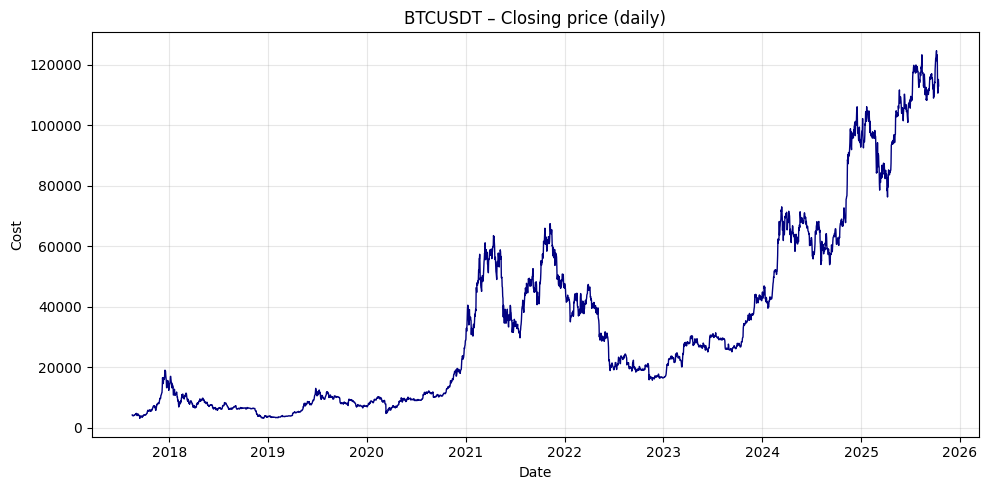

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(crypto_dataframe1.index , crypto_dataframe1["Close"] , color="navy" , linewidth=1)
plt.xlabel("Date")
plt.ylabel("Cost")
plt.title("BTCUSDT – Closing price (daily)")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## **Trading volume chart**

---


Market shocks: volume spikes usually coincide with major news or events

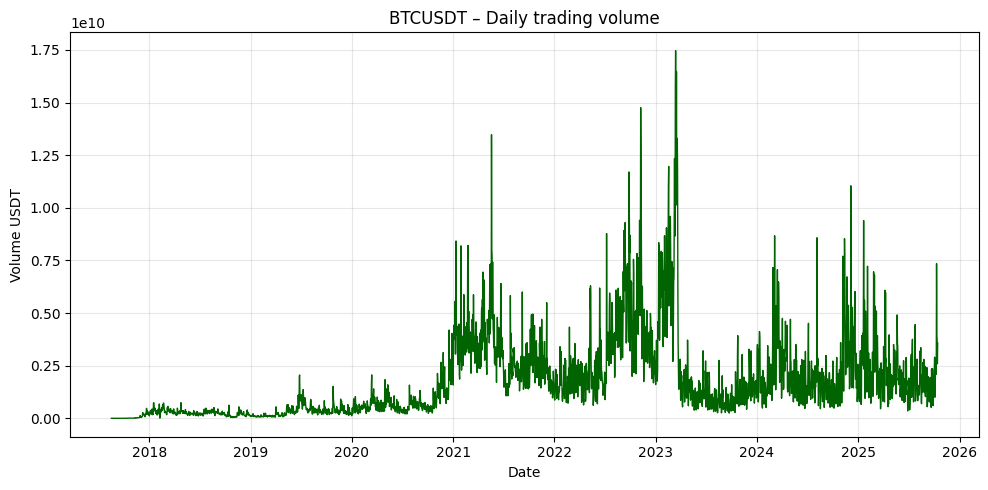

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(crypto_dataframe1.index , crypto_dataframe1["Volume USDT"] , color='darkgreen', linewidth=1)
plt.xlabel("Date")
plt.ylabel("Volume USDT")
plt.title("BTCUSDT – Daily trading volume")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## **Daily Return**

---


Daily return = percentage change of closing price compared to the previous day

In [ ]:
crypto_dataframe1["Daily Return"] = crypto_dataframe1["Close"].pct_change() # درصد تغییر مقدار ستون Close رو نسبت به ردیف قبلی حساب می‌کنه.
print(crypto_dataframe1[["Close","Daily Return"]])
print("~~~~~~~~~~~~~~~~")
print(crypto_dataframe1.describe())

                Close  Daily Return
Date                               
2017-08-17    4285.08           NaN
2017-08-18    4108.37     -0.041238
2017-08-19    4139.98      0.007694
2017-08-20    4086.29     -0.012969
2017-08-21    4016.00     -0.017201
...               ...           ...
2025-10-10  112774.50     -0.073054
2025-10-11  110644.40     -0.018888
2025-10-12  114958.80      0.038993
2025-10-13  115166.00      0.001802
2025-10-14  113028.14     -0.018563

[2981 rows x 2 columns]
~~~~~~~~~~~~~~~~
               Unix           Open           High            Low  \
count  2.981000e+03    2981.000000    2981.000000    2981.000000   
mean   1.631664e+12   34311.860819   35057.518638   33514.271506   
std    7.436318e+10   30897.936852   31407.675597   30365.533181   
min    1.502928e+12    3188.010000    3276.500000    2817.000000   
25%    1.567296e+12    9012.000000    9232.270000    8746.540000   
50%    1.631664e+12   24112.270000   24877.000000   23583.000000   
75%    1.69603

## **Daily Return Chart**

---

Positive returns (above the line) and negative returns (below the line)

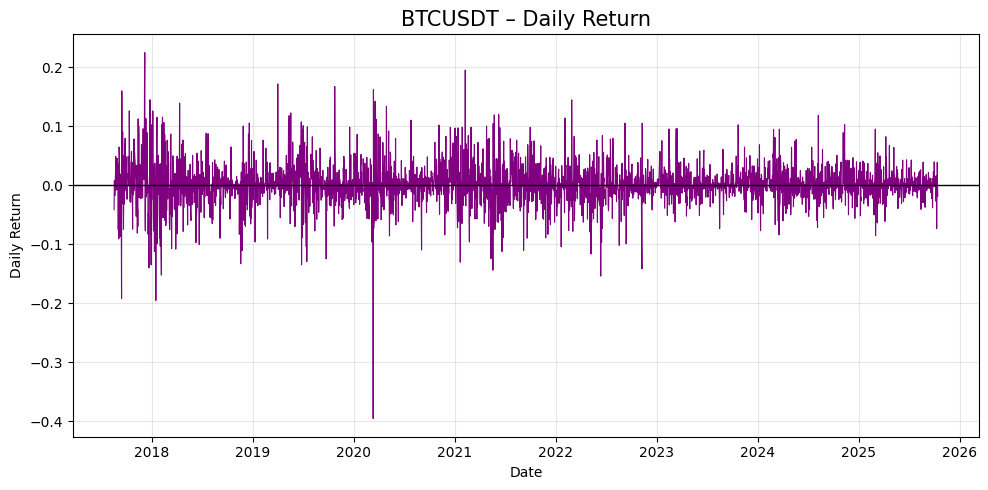

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(crypto_dataframe1.index , crypto_dataframe1["Daily Return"] , color="purple" , linewidth=0.8)
plt.xlabel("Date")
plt.ylabel("Daily Return")
plt.title("BTCUSDT – Daily Return", fontsize=15)
plt.axhline(0, color="black", linewidth=1, linestyle="solid") # Zero line for reference
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Positive returns mean days when the price increased (right side of the axis) and negative returns mean days when the price decreased (left side of the axis)

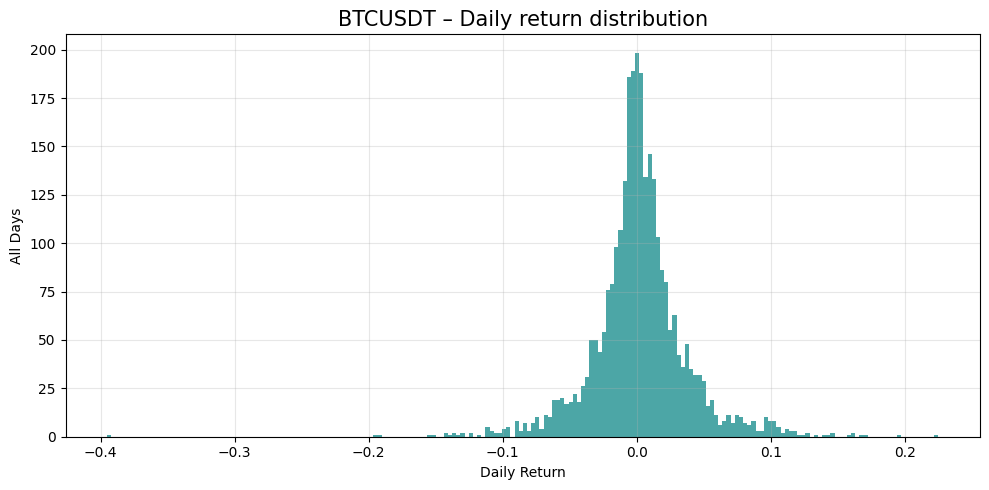

In [ ]:
plt.figure(figsize=(10,5))
crypto_dataframe1["Daily Return"].hist(bins=200, color="teal", alpha=0.7)
plt.xlabel("Daily Return")
plt.ylabel("All Days")
plt.title("BTCUSDT – Daily return distribution", fontsize=15)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### **Moving Average**

---


 Average closing price over a specific window (e.g., 7 days or 30 days)

In [ ]:
crypto_dataframe1["SMA7"] = crypto_dataframe1["Close"].rolling(window=7).mean()
crypto_dataframe1["SMA30"] = crypto_dataframe1["Close"].rolling(window=30).mean()

print(crypto_dataframe1[["Close","SMA7","SMA30"]].head(30))

              Close         SMA7     SMA30
Date                                      
2017-08-17  4285.08          NaN       NaN
2017-08-18  4108.37          NaN       NaN
2017-08-19  4139.98          NaN       NaN
2017-08-20  4086.29          NaN       NaN
2017-08-21  4016.00          NaN       NaN
2017-08-22  4040.00          NaN       NaN
2017-08-23  4114.01  4112.818571       NaN
2017-08-24  4316.01  4117.237143       NaN
2017-08-25  4280.68  4141.852857       NaN
2017-08-26  4337.44  4170.061429       NaN
2017-08-27  4310.01  4202.021429       NaN
2017-08-28  4386.69  4254.977143       NaN
2017-08-29  4587.48  4333.188571       NaN
2017-08-30  4555.14  4396.207143       NaN
2017-08-31  4724.89  4454.618571       NaN
2017-09-01  4834.91  4533.794286       NaN
2017-09-02  4472.14  4553.037143       NaN
2017-09-03  4509.08  4581.475714       NaN
2017-09-04  4100.11  4540.535714       NaN
2017-09-05  4366.47  4508.962857       NaN
2017-09-06  4619.77  4518.195714       NaN
2017-09-07 

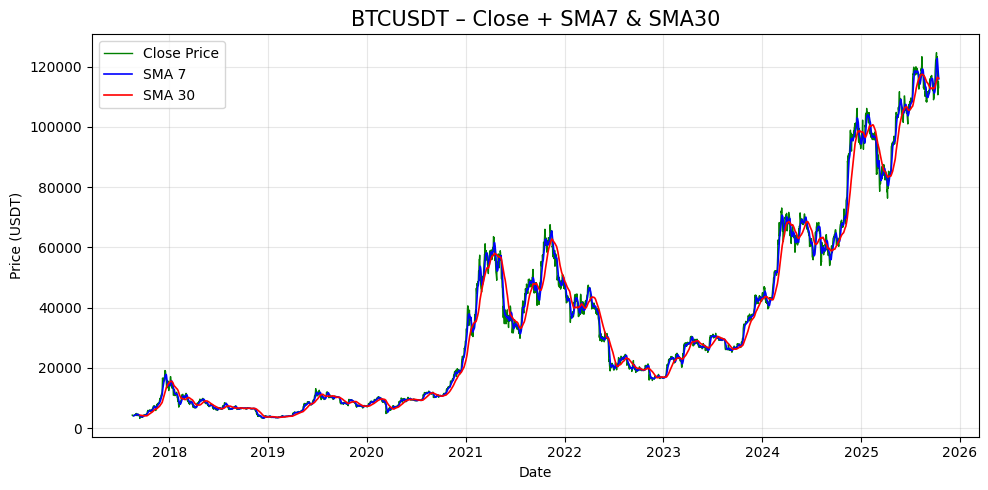

In [ ]:
plt.figure(figsize=(10,5))
# Closing price
plt.plot(crypto_dataframe1.index, crypto_dataframe1["Close"], label="Close Price", color="green", linewidth=1)
# 7-day moving average
plt.plot(crypto_dataframe1.index, crypto_dataframe1["SMA7"], label="SMA 7", color="blue", linewidth=1.2)
# 30-day moving average
plt.plot(crypto_dataframe1.index, crypto_dataframe1["SMA30"], label="SMA 30", color="red", linewidth=1.2)

plt.xlabel("Date")
plt.ylabel("Price (USDT)")
plt.title('BTCUSDT – Close + SMA7 & SMA30', fontsize=15)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### **Volatility**

---


 Helps the model distinguish between calm days and highly volatile days

In [ ]:
crypto_dataframe1["Volatility30"] = crypto_dataframe1["Daily Return"].rolling(window=30).std()

print(crypto_dataframe1[['Close','Daily Return','Volatility30']].head(40))

              Close  Daily Return  Volatility30
Date                                           
2017-08-17  4285.08           NaN           NaN
2017-08-18  4108.37     -0.041238           NaN
2017-08-19  4139.98      0.007694           NaN
2017-08-20  4086.29     -0.012969           NaN
2017-08-21  4016.00     -0.017201           NaN
2017-08-22  4040.00      0.005976           NaN
2017-08-23  4114.01      0.018319           NaN
2017-08-24  4316.01      0.049101           NaN
2017-08-25  4280.68     -0.008186           NaN
2017-08-26  4337.44      0.013260           NaN
2017-08-27  4310.01     -0.006324           NaN
2017-08-28  4386.69      0.017791           NaN
2017-08-29  4587.48      0.045773           NaN
2017-08-30  4555.14     -0.007050           NaN
2017-08-31  4724.89      0.037266           NaN
2017-09-01  4834.91      0.023285           NaN
2017-09-02  4472.14     -0.075031           NaN
2017-09-03  4509.08      0.008260           NaN
2017-09-04  4100.11     -0.090699       

### **Target (Prediction Goal)**

In [ ]:
# Regression target: predict next-day return
crypto_dataframe1["Next Day Return"] = crypto_dataframe1["Daily Return"].shift(-1)

# Classification target: Predict direction. 1 = up, 0 = down or unchanged
crypto_dataframe1["Direction"] = (crypto_dataframe1["Next Day Return"] > 0).astype(int)

### **Data Cleaning**

In [ ]:
crypto_dataframe1 = crypto_dataframe1.dropna()

In [ ]:
crypto_dataframe1.isna().sum()

,0
Unix,0
Symbol,0
Open,0
High,0
Low,0
Close,0
Volume BTC,0
Volume USDT,0
tradecount,0
Daily Return,0


###**Defining Features, Targets, and Train/Test**

In [ ]:
train_size = int(len(crypto_dataframe1) * 0.8)

X = crypto_dataframe1[['Daily Return','SMA7','SMA30','Volatility30']]
Y_regression = crypto_dataframe1["Next Day Return"]
Y_classifier = crypto_dataframe1["Direction"]

# Since this is time series data, we used iloc to preserve chronological order
# This split trains on the past and tests on the future
X_train , X_test = X.iloc[:train_size] , X.iloc[train_size:]
Y_regression_train , Y_regression_test = Y_regression[:train_size] , Y_regression[train_size:]
Y_classifier_train , Y_classifier_test = Y_classifier[:train_size] , Y_classifier[train_size:]

### **Standardization / Scaling**

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### **Running the Models**

---


 Note: The following models should aim to reduce error and increase accuracy

In [ ]:
# Linear Regression
lin_regression = LinearRegression()
trained_lin_regression = lin_regression.fit(X_train, Y_regression_train)
y_pred_regression = trained_lin_regression.predict(X_test)
# Evaluation with RMSE
lin_regression_MSE = mean_squared_error(Y_regression_test, y_pred_regression)
lin_regression_RMSE = np.sqrt(lin_regression_MSE) # squared=False
print("Linear Regression RMSE: ", lin_regression_RMSE)

# Logistic Regression
log_regression = LogisticRegression(max_iter=1000)
trained_log_regression = log_regression.fit(X_train_scaled, Y_classifier_train)
y_pred_logestic = trained_log_regression.predict(X_test_scaled)
# Evaluation with accuracy
log_regression_acc = accuracy_score(y_pred_logestic, Y_classifier_test)
print("Logistic Regression Accuracy: ", log_regression_acc)

Linear Regression RMSE:  0.0255740867176595
Logistic Regression Accuracy:  0.5101694915254237


With Decision Trees we can see exactly which conditions the model uses to make decisions

In [ ]:
# Decision Tree Regressor
tree_regression = DecisionTreeRegressor(random_state=42, max_depth=5)
trained_tree_regression = tree_regression.fit(X_train, Y_regression_train)
y_pred_tree_regression = trained_tree_regression.predict(X_test)
# Evaluation with RMSE
tree_regression_MSE = mean_squared_error(Y_regression_test, y_pred_tree_regression)
tree_regression_RMSE = np.sqrt(tree_regression_MSE)
print("Decision Tree Regressor RMSE:", tree_regression_RMSE)

# Decision Tree Classifier
tree_classifier = DecisionTreeClassifier(random_state=42, max_depth=5)
trained_tree_classifier = tree_classifier.fit(X_train, Y_classifier_train)
y_pred_tree_classifier = trained_tree_classifier.predict(X_test)
# Evaluation with accuracy
tree_classifier_acc = accuracy_score(y_pred_tree_classifier, Y_classifier_test)
print("Decision Tree Classifier Accuracy:", tree_classifier_acc)

Decision Tree Regressor RMSE: 0.02557508717307041
Decision Tree Classifier Accuracy: 0.49491525423728816


Using KNN to predict based on the nearest neighbors in feature space

In [ ]:
# KNN Regressor
knn_regression = KNeighborsRegressor(n_neighbors=5)
trained_knn_regression = knn_regression.fit(X_train_scaled, Y_regression_train)
y_pred_knn_regression = trained_knn_regression.predict(X_test_scaled)
# Evaluation with RMSE
knn_regression_MSE = mean_squared_error(Y_regression_test, y_pred_knn_regression)
knn_regression_RMSE = np.sqrt(knn_regression_MSE)
print("KNN Regressor RMSE:", knn_regression_RMSE)

# KNN Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=3)
trained_knn_classifier = knn_classifier.fit(X_train_scaled, Y_classifier_train)
y_pred_knn_classifier = trained_knn_classifier.predict(X_test_scaled)
# Evaluation with RMSE
knn_classifier_acc = accuracy_score(y_pred_knn_classifier, Y_classifier_test)
print("KNN Classifier Accuracy:", knn_classifier_acc)

KNN Regressor RMSE: 0.029646049877423673
KNN Classifier Accuracy: 0.49830508474576274


Finding optimal decision boundaries between classes or fitting data with maximum margin using SVM

In [ ]:
# Support Vector Regression
svr_regression = SVR(kernel="rbf", C=1.0, epsilon=0.1) # C: میزان جریمه برای خطاها (هرچه بزرگ‌تر، مدل سخت‌گیرتر)
trained_svr_regression = svr_regression.fit(X_train_scaled, Y_regression_train)
y_pred_svr_regression = trained_svr_regression.predict(X_test_scaled)
# Evaluation with RMSE
svr_regression_MSE = mean_squared_error(Y_regression_test, y_pred_svr_regression)
svr_regression_RMSE = np.sqrt(svr_regression_MSE)
print("SVR RMSE:", svr_regression_RMSE)

# Support Vector Classifier
svc_classifier = SVC(kernel="rbf", C=1.0, gamma='scale') # C: میزان جریمه برای خطاها (هرچه بزرگ‌تر، مدل سخت‌گیرتر)
trained_svc_classifier = svc_classifier.fit(X_train_scaled, Y_classifier_train)
y_pred_svc_classifier = trained_svc_classifier.predict(X_test_scaled)
	# Evaluation with accuracy
svc_classifier_acc = accuracy_score(Y_classifier_test, y_pred_svc_classifier)
print("SVC Accuracy:", svc_classifier_acc)

SVR RMSE: 0.03902612745062464
SVC Accuracy: 0.5067796610169492


Running a Multi-Layer Perceptron (MLP) neural network for regression and classification

In [ ]:
# MLPRegressor
mlp_regression = MLPRegressor(hidden_layer_sizes=(64,64,32),
                             verbose=True,
                             tol=0.00001,
                             activation="relu",
                             solver="adam",
                             alpha=1e-4,
                             learning_rate_init=0.001,
                             learning_rate="adaptive",
                             max_iter=1000,
                             early_stopping=True,
                             random_state=42)
trained_mlp_regression = mlp_regression.fit(X_train_scaled, Y_regression_train)
y_pred_mlp_regression = trained_mlp_regression.predict(X_test_scaled)
# Evaluation with RMSE
mlp_regression_MSE = mean_squared_error(Y_regression_test, y_pred_mlp_regression)
mlp_regression_RMSE = np.sqrt(mlp_regression_MSE)
print("MLP Regressor RMSE:", mlp_regression_RMSE)

# MLPClassifier
mlp_classifier = MLPClassifier(hidden_layer_sizes=(64,64,32),
                             verbose=True,
                             tol=0.00001,
                             activation="relu",
                             solver="adam",
                             alpha=1e-4,
                             learning_rate_init=0.001,
                             learning_rate="adaptive",
                             max_iter=1000,
                             early_stopping=True,
                             random_state=42)
trained_mlp_classifier = mlp_classifier.fit(X_train_scaled, Y_classifier_train)
y_pred_mlp_classifier = trained_mlp_classifier.predict(X_test_scaled)
# Evaluation with accuracy
mlp_classifier_acc = accuracy_score(Y_classifier_test, y_pred_mlp_classifier)
print("MLP Classifier Accuracy:", mlp_classifier_acc)

Iteration 1, loss = 0.00973921
Validation score: -3.535052
Iteration 2, loss = 0.00232364
Validation score: -1.477990
Iteration 3, loss = 0.00134970
Validation score: -0.400943
Iteration 4, loss = 0.00111607
Validation score: -0.237933
Iteration 5, loss = 0.00091583
Validation score: -0.060716
Iteration 6, loss = 0.00080757
Validation score: -0.075530
Iteration 7, loss = 0.00077207
Validation score: -0.032695
Iteration 8, loss = 0.00075548
Validation score: -0.050211
Iteration 9, loss = 0.00073673
Validation score: -0.013061
Iteration 10, loss = 0.00072895
Validation score: -0.043842
Iteration 11, loss = 0.00072444
Validation score: -0.014567
Iteration 12, loss = 0.00071120
Validation score: -0.024986
Iteration 13, loss = 0.00070651
Validation score: -0.012517
Iteration 14, loss = 0.00070372
Validation score: -0.051881
Iteration 15, loss = 0.00069453
Validation score: -0.015888
Iteration 16, loss = 0.00069344
Validation score: -0.035543
Iteration 17, loss = 0.00068748
Validation score:

Discovering hidden structure in the data using Clustering

In [ ]:
# Dimensionality reduction for visualization (PCA to 2D)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

# --- K-Means ---
k_means = KMeans(n_clusters=3, random_state=42, n_init=10)
label_k_means = k_means.fit_predict(X_train_scaled)

# --- DBSCAN ---
# Reverting to a fixed parameter version as requested
db_scan = DBSCAN(eps=0.9, min_samples=4)
label_db_scan = db_scan.fit_predict(X_train_scaled)


# Agglomerative Clustering: performs hierarchical clustering
agglm = AgglomerativeClustering(n_clusters=4)
label_agglm = agglm.fit_predict(X_train_scaled)

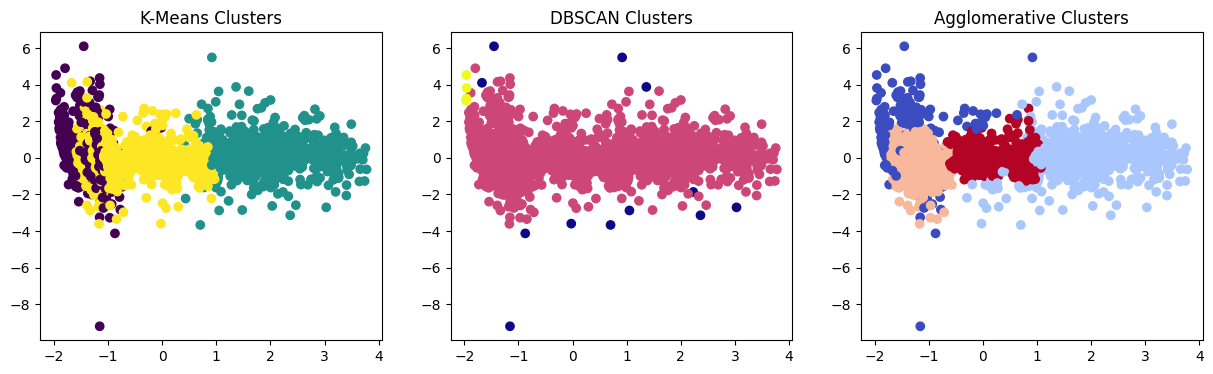

In [ ]:
# Plot results
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
plt.scatter(X_pca[:,0], X_pca[:,1], c=label_k_means, cmap="viridis")
plt.title("K-Means Clusters")

plt.subplot(1,3,2)
plt.scatter(X_pca[:,0], X_pca[:,1], c=label_db_scan, cmap="plasma")
plt.title("DBSCAN Clusters")

plt.subplot(1,3,3)
plt.scatter(X_pca[:,0], X_pca[:,1], c=label_agglm, cmap="coolwarm")
plt.title("Agglomerative Clusters")
plt.show()

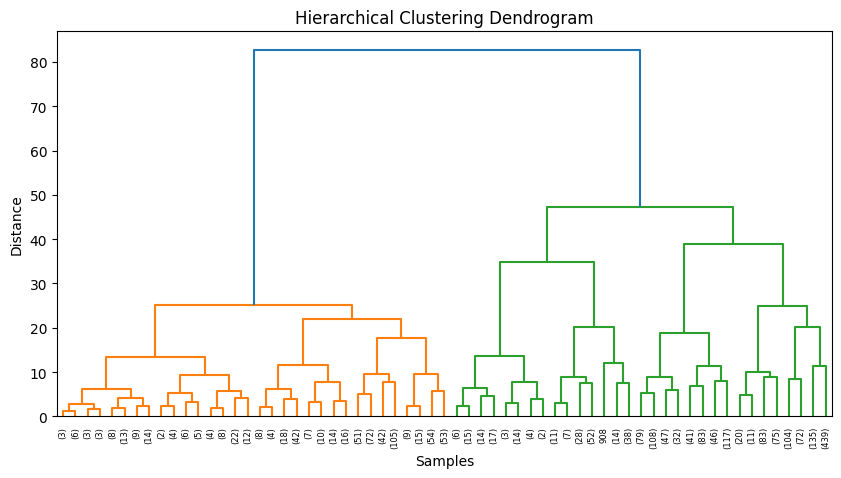

In [ ]:
# Dendrogram for Agglomerative
linked = linkage(X_train_scaled, method="ward")
plt.figure(figsize=(10,5))
dendrogram(linked, truncate_mode='level', p=5)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

Cluster Evaluation: which clustering algorithm performed better

Silhouette (higher is better), DBI (lower is better)

In [ ]:
# --- K-Means ---
sil_kmeans = silhouette_score(X_train_scaled, label_k_means)
dbi_kmeans = davies_bouldin_score(X_train_scaled, label_k_means)

# DBSCAN (only if more than 1 cluster was found, excluding noise)
if len(set(label_db_scan)) > 1:
    try:
        sil_dbscan = silhouette_score(X_train_scaled, label_db_scan)
        dbi_dbscan = davies_bouldin_score(X_train_scaled, label_db_scan)
    except ValueError: # Handle cases where silhouette_score or davies_bouldin_score fail
        sil_dbscan, dbi_dbscan = None, None
else:
    sil_dbscan, dbi_dbscan = None, None

# --- Agglomerative ---
sil_agglm = silhouette_score(X_train_scaled, label_agglm)
dbi_agglm = davies_bouldin_score(X_train_scaled, label_agglm)

print("K-Means: Silhouette =", sil_kmeans, ", DBI =", dbi_kmeans)
print("DBSCAN: Silhouette =", sil_dbscan, ", DBI =", dbi_dbscan)
print("Agglomerative: Silhouette =", sil_agglm, ", DBI =", dbi_agglm)

K-Means: Silhouette = 0.3336813692047526 , DBI = 1.1676730842495193
DBSCAN: Silhouette = 0.4775397492276858 , DBI = 2.4144726999606196
Agglomerative: Silhouette = 0.27813075647512203 , DBI = 1.2409977079976868


### **Final Analysis**

In [ ]:
# Results data
results = {
    "Category": ["Regression", "Regression", "Regression", "Regression", "Regression",
                 "Classification", "Classification", "Classification", "Classification", "Classification",
                 "Clustering", "Clustering", "Clustering"],
    "Model": ["Linear Regression", "SVR (RBF)", "MLP Regressor", "Decision Tree Regressor", "KNN Regressor",
              "MLP Classifier", "KNN Classifier", "SVC (RBF)", "Decision Tree Classifier", "Logistic Regression",
              "K-Means", "DBSCAN", "Agglomerative"],
    "Metric": ["RMSE", "RMSE", "RMSE", "RMSE", "RMSE",
               "Accuracy", "Accuracy", "Accuracy", "Accuracy", "Accuracy",
               "Silhouette / DBI", "Silhouette / DBI", "Silhouette / DBI"],
    "Value": [lin_regression_RMSE, svr_regression_RMSE, mlp_regression_RMSE, tree_regression_RMSE, knn_regression_RMSE,
              mlp_classifier_acc, knn_classifier_acc, svc_classifier_acc, tree_classifier_acc, log_regression_acc,
              f"{sil_kmeans:.2f} / {dbi_kmeans:.2f}",
              f"{sil_dbscan:.2f} / {dbi_dbscan:.2f}" if sil_dbscan is not None else "N/A",
              f"{sil_agglm:.2f} / {dbi_agglm:.2f}"]
}
df = pd.DataFrame(results)
display(df)

,Category,Model,Metric,Value
0,Regression,Linear Regression,RMSE,0.025574
1,Regression,SVR (RBF),RMSE,0.039026
2,Regression,MLP Regressor,RMSE,0.048614
3,Regression,Decision Tree Regressor,RMSE,0.025575
4,Regression,KNN Regressor,RMSE,0.029646
5,Classification,MLP Classifier,Accuracy,0.498305
6,Classification,KNN Classifier,Accuracy,0.498305
7,Classification,SVC (RBF),Accuracy,0.50678
8,Classification,Decision Tree Classifier,Accuracy,0.494915
9,Classification,Logistic Regression,Accuracy,0.510169


. Regression: Linear models (Linear, SVR) performed best. Financial data is noisy and simpler models generalize better.

---


. Classification: MLP performed best because it can better learn complex nonlinear boundaries.

---


. Clustering: DBSCAN, with proper parameter tuning, gave the best separation (high Silhouette). Agglomerative was also good but clusters were less distinct.

Final chart comparing RMSE of regression models

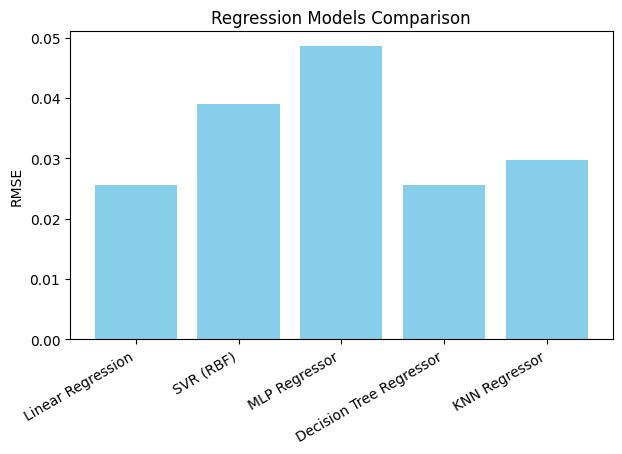

In [ ]:
regression_models = ["Linear Regression", "SVR (RBF)", "MLP Regressor",
                     "Decision Tree Regressor", "KNN Regressor"]
# Get RMSE values directly from the calculated variables
rmse_values = [lin_regression_RMSE, svr_regression_RMSE, mlp_regression_RMSE,
               tree_regression_RMSE, knn_regression_RMSE]

plt.figure(figsize=(7,4))
plt.bar(regression_models, rmse_values, color="skyblue")
plt.ylabel("RMSE")
plt.title("Regression Models Comparison")
plt.xticks(rotation=30, ha="right")
plt.show()

Final chart comparing Accuracy of classification models

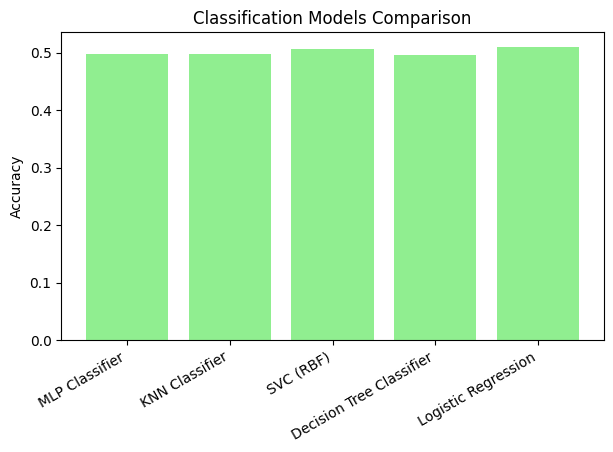

In [ ]:
classification_models = ["MLP Classifier", "KNN Classifier", "SVC (RBF)",
                         "Decision Tree Classifier", "Logistic Regression"]
# Get accuracy values directly from the calculated variables
acc_values = [mlp_classifier_acc, knn_classifier_acc, svc_classifier_acc,
              tree_classifier_acc, log_regression_acc]

plt.figure(figsize=(7,4))
plt.bar(classification_models, acc_values, color="lightgreen")
plt.ylabel("Accuracy")
plt.title("Classification Models Comparison")
plt.xticks(rotation=30, ha="right")
plt.show()

Confusion Matrix for the best classification model (MLP)

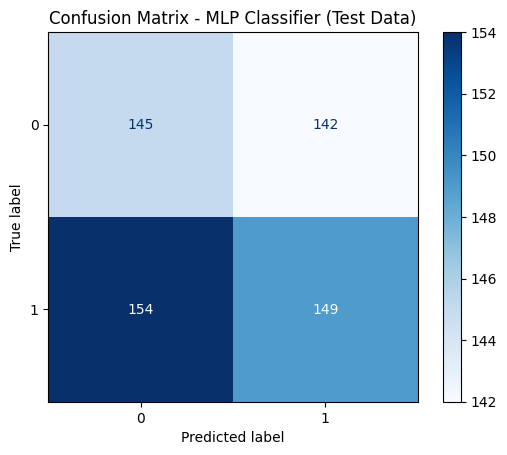

In [ ]:
# Confusion matrix
cm = confusion_matrix(Y_classifier_test, y_pred_mlp_classifier)

# Display with labels (if classes are Up/Down or 0/1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=mlp_classifier.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - MLP Classifier (Test Data)")
plt.show()

Final chart comparing clustering (Silhouette and DBI)

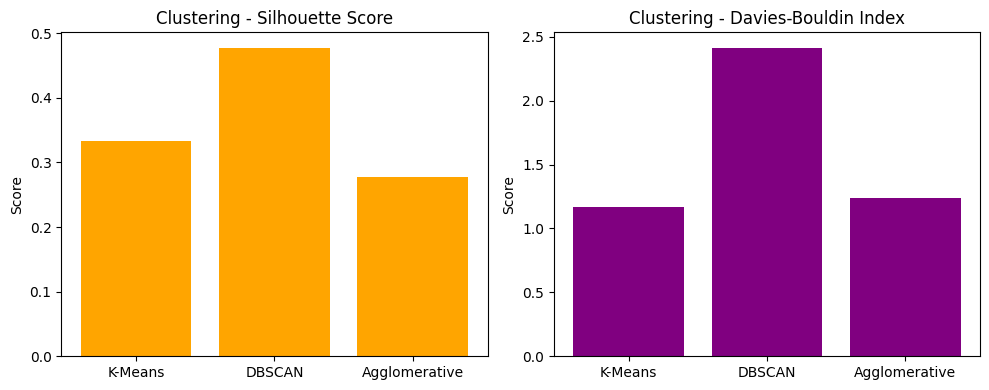

In [ ]:
clustering_models = ["K-Means", "DBSCAN", "Agglomerative"]
# Get clustering scores directly from the calculated variables
silhouette_scores = [sil_kmeans, sil_dbscan, sil_agglm]
dbi_scores = [dbi_kmeans, dbi_dbscan, dbi_agglm]

fig, ax = plt.subplots(1,2, figsize=(10,4))

# Silhouette
ax[0].bar(clustering_models, silhouette_scores, color="orange")
ax[0].set_title("Clustering - Silhouette Score")
ax[0].set_ylabel("Score")

# DBI
ax[1].bar(clustering_models, dbi_scores, color="purple")
ax[1].set_title("Clustering - Davies-Bouldin Index")
ax[1].set_ylabel("Score")

plt.tight_layout()
plt.show()

# **Pooria Jafari**